In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clean_data.csv')
df.head(595)

,Unnamed: 0,Rank,University,Location,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook,11 Years Articles,11 Years Citations,Current Years Citations,Average Citations,H-Index,Hi-Ci Papers
0,0,1,University of Oxford,United Kingdom,98.50,96.8,100.0,98.8,99.6,97.3,57.4,58.6,51.3,55.5,69.9,82.6
1,1,2,Massachusetts Institute of Technology,United States,97.74,99.2,96.0,99.7,100.0,93.8,46.8,45.7,49.1,47.0,89.6,75.7
2,6,3,California Institute of Technology,United States,95.94,95.2,97.5,97.3,100.0,89.7,35.8,34.7,32.2,34.0,76.6,59.2
3,5,4,Stanford University,United States,95.90,97.5,97.3,99.6,100.0,85.1,56.6,58.1,55.0,56.6,77.8,84.9
4,3,5,Princeton University,United States,95.90,98.3,98.0,98.9,96.9,87.4,35.6,35.0,31.1,33.6,71.8,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,354,Ain Shams University,Egypt,36.40,26.8,16.4,46.2,39.4,53.2,30.2,31.8,23.2,29.3,42.7,49.1
354,354,355,University of Belgrade,Serbia,35.86,22.4,27.8,50.0,37.6,41.5,35.9,35.9,25.6,30.0,42.3,52.8
355,356,356,University of La Laguna,Spain,35.60,23.9,16.9,55.9,31.3,50.0,28.9,28.7,23.4,26.8,53.8,45.9
356,310,357,Kurdistan University of Medical Sciences,Iran,35.12,42.3,11.7,68.9,21.9,30.8,25.8,25.3,21.6,25.0,85.1,38.1


### K-Means Clustering w Elbow Method

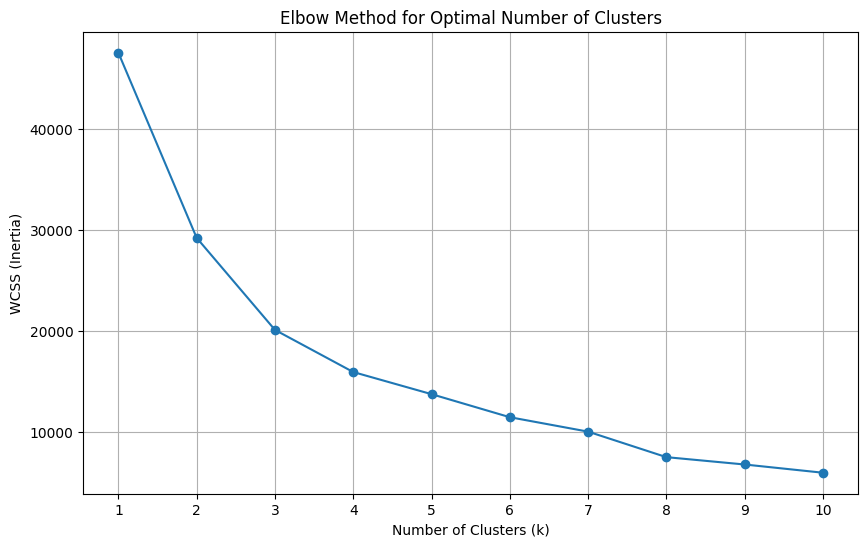

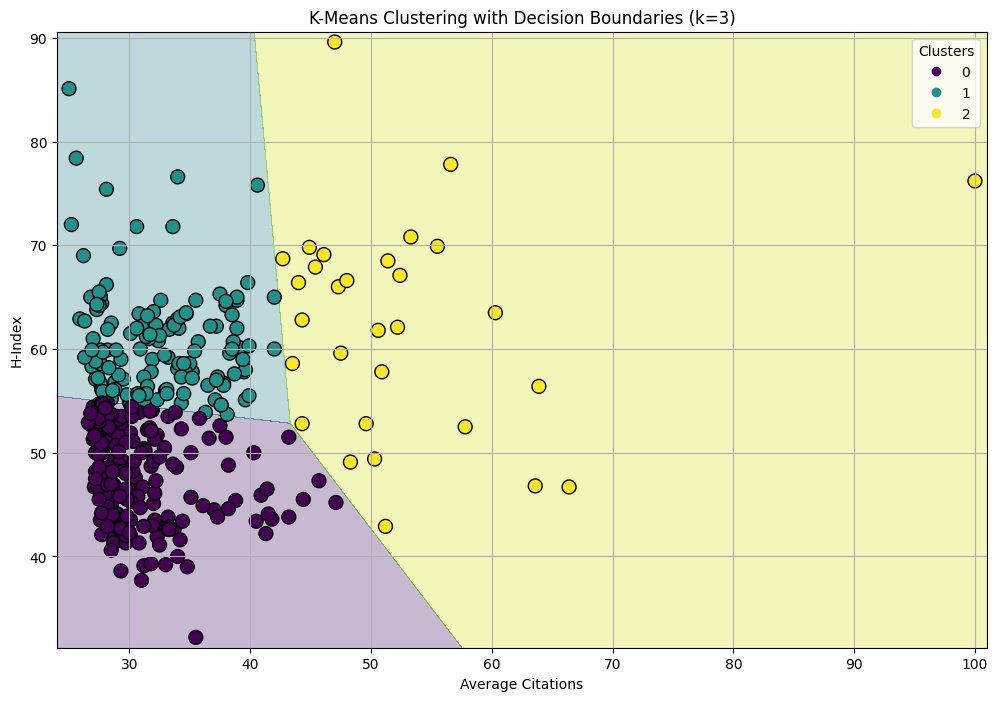

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is already loaded and processed

# Ensure that 'Average Citations' and 'H-Index' are numeric
df['Average Citations'] = pd.to_numeric(df['Average Citations'], errors='coerce')
df['H-Index'] = pd.to_numeric(df['H-Index'], errors='coerce')

# Drop rows with NaN values in 'Average Citations' or 'H-Index'
df.dropna(subset=['Average Citations', 'H-Index'], inplace=True)

# Prepare features for clustering (Average Citations and H-Index)
X = df[['Average Citations', 'H-Index']].values

# Elbow Method to determine optimal number of clusters
wcss = []  # List to store the within-cluster sum of squares (WCSS)

# Try different values of k (number of clusters)
for k in range(1, 11):  # You can test k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Append the inertia for this k

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# From the Elbow plot, determine the optimal number of clusters
# For example, let's assume k=3 is optimal based on the plot (you may adjust this value)
optimal_k = 3

# Run K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans_optimal.fit_predict(X)

# Print the clusters for each university

# Generate a mesh grid (x_min, x_max, y_min, y_max)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster label for each point in the grid
Z = kmeans_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot of the actual data points
scatter = plt.scatter(df['Average Citations'], df['H-Index'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=100)

# Add labels and title
plt.xlabel('Average Citations')
plt.ylabel('H-Index')
plt.title(f'K-Means Clustering with Decision Boundaries (k={optimal_k})')

# Add a legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


In [34]:
df[['University', 'Location', 'Average Citations', 'H-Index', 'Cluster']]

,University,Location,Average Citations,H-Index,Cluster
0,University of Oxford,United Kingdom,55.5,69.9,2
1,Massachusetts Institute of Technology,United States,47.0,89.6,2
2,California Institute of Technology,United States,34.0,76.6,1
3,Stanford University,United States,56.6,77.8,2
4,Princeton University,United States,33.6,71.8,1
...,...,...,...,...,...
353,Ain Shams University,Egypt,29.3,42.7,0
354,University of Belgrade,Serbia,30.0,42.3,0
355,University of La Laguna,Spain,26.8,53.8,0
356,Kurdistan University of Medical Sciences,Iran,25.0,85.1,1


In [55]:
X = df[['11 Years Articles' ,'11 Years Citations', 'Current Years Citations', 'Hi-Ci Papers']]
y = df['Average Citations']

In [63]:
X

,11 Years Articles,11 Years Citations,Current Years Citations,Hi-Ci Papers
0,57.4,58.6,51.3,82.6
1,46.8,45.7,49.1,75.7
2,35.8,34.7,32.2,59.2
3,56.6,58.1,55.0,84.9
4,35.6,35.0,31.1,59.2
...,...,...,...,...
353,30.2,31.8,23.2,49.1
354,35.9,35.9,25.6,52.8
355,28.9,28.7,23.4,45.9
356,25.8,25.3,21.6,38.1


In [64]:
y

0      55.5
1      47.0
2      34.0
3      56.6
4      33.6
       ... 
353    29.3
354    30.0
355    26.8
356    25.0
357    29.2
Name: Average Citations, Length: 358, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = linear_model.predict(X_test)

In [59]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Root Mean Squared Error: 2.42
R^2 Score: 0.91


In [61]:
df_regression = pd.DataFrame({"Test":y_test, "Prediction":y_pred})
df_regression

,Test,Prediction
223,25.9,24.297028
42,63.6,57.653931
261,26.8,25.971718
301,33.0,33.457103
56,33.3,34.891044
...,...,...
198,43.2,40.127614
227,38.2,37.419407
93,44.4,41.643533
352,28.5,29.431947


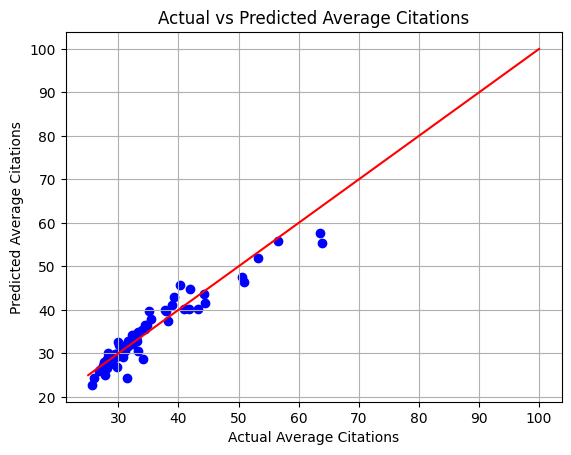

In [108]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='-')  # Line for perfect prediction
plt.title('Actual vs Predicted Average Citations')
plt.xlabel('Actual Average Citations')
plt.ylabel('Predicted Average Citations')
plt.grid(True)
plt.show()

In [95]:
df


,Unnamed: 0,Rank,University,Location,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook,11 Years Articles,11 Years Citations,Current Years Citations,Average Citations,H-Index,Hi-Ci Papers,Cluster
0,0,1,University of Oxford,United Kingdom,98.50,96.8,100.0,98.8,99.6,97.3,57.4,58.6,51.3,55.5,69.9,82.6,2
1,1,2,Massachusetts Institute of Technology,United States,97.74,99.2,96.0,99.7,100.0,93.8,46.8,45.7,49.1,47.0,89.6,75.7,2
2,6,3,California Institute of Technology,United States,95.94,95.2,97.5,97.3,100.0,89.7,35.8,34.7,32.2,34.0,76.6,59.2,1
3,5,4,Stanford University,United States,95.90,97.5,97.3,99.6,100.0,85.1,56.6,58.1,55.0,56.6,77.8,84.9,2
4,3,5,Princeton University,United States,95.90,98.3,98.0,98.9,96.9,87.4,35.6,35.0,31.1,33.6,71.8,59.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,354,Ain Shams University,Egypt,36.40,26.8,16.4,46.2,39.4,53.2,30.2,31.8,23.2,29.3,42.7,49.1,0
354,354,355,University of Belgrade,Serbia,35.86,22.4,27.8,50.0,37.6,41.5,35.9,35.9,25.6,30.0,42.3,52.8,0
355,356,356,University of La Laguna,Spain,35.60,23.9,16.9,55.9,31.3,50.0,28.9,28.7,23.4,26.8,53.8,45.9,0
356,310,357,Kurdistan University of Medical Sciences,Iran,35.12,42.3,11.7,68.9,21.9,30.8,25.8,25.3,21.6,25.0,85.1,38.1,1


In [3]:
import pandas as pd

# Create a dictionary to map countries to continents
country_to_continent = {
    'United States': 'North America',
    'China': 'Asia',
    'United Kingdom': 'Europe',
    'Italy': 'Europe',
    'Australia': 'Oceania',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'France': 'Europe',
    'Finland': 'Europe',
    'Sweden': 'Europe',
    'Denmark': 'Europe',
    'Saudi Arabia': 'Asia',
    'Iran': 'Asia',
    'Norway': 'Europe',
    'South Africa': 'Africa',
    'Portugal': 'Europe',
    'Austria': 'Europe',
    'Switzerland': 'Europe',
    'Hong Kong': 'Asia',
    'Belgium': 'Europe',
    'Egypt': 'Africa',
    'Taiwan': 'Asia',
    'Brazil': 'South America',
    'Thailand': 'Asia',
    'Poland': 'Europe',
    'Malaysia': 'Asia',
    'Ireland': 'Europe',
    'United Arab Emirates': 'Asia',
    'New Zealand': 'Oceania',
    'Israel': 'Asia',
    'Singapore': 'Asia',
    'Croatia': 'Europe',
    'Vietnam': 'Asia',
    'Chile': 'South America',
    'Greece': 'Europe',
    'Pakistan': 'Asia',
    'Slovenia': 'Europe',
    'Mexico': 'North America',
    'Russian Federation': 'Europe',
    'Lebanon': 'Asia',
    'Macao': 'Asia',
    'Bicocca': 'Europe',  # This seems like a university name, may need further clarification
    'Columbia': 'South America',
    'Iceland': 'Europe',
    'Hungary': 'Europe',
    'Estonia': 'Europe',
    'Serbia': 'Europe'
}

def add_continent_column(df, location_column):
    df['Continent'] = df[location_column].map(country_to_continent)
    return df

# Add 'Continent' column
df = add_continent_column(df, 'Location')

df


,Unnamed: 0,Rank,University,Location,Overall,Teaching,Research Environment,Research Quality,Industry,International Outlook,11 Years Articles,11 Years Citations,Current Years Citations,Average Citations,H-Index,Hi-Ci Papers,Continent
0,0,1,University of Oxford,United Kingdom,98.50,96.8,100.0,98.8,99.6,97.3,57.4,58.6,51.3,55.5,69.9,82.6,Europe
1,1,2,Massachusetts Institute of Technology,United States,97.74,99.2,96.0,99.7,100.0,93.8,46.8,45.7,49.1,47.0,89.6,75.7,North America
2,6,3,California Institute of Technology,United States,95.94,95.2,97.5,97.3,100.0,89.7,35.8,34.7,32.2,34.0,76.6,59.2,North America
3,5,4,Stanford University,United States,95.90,97.5,97.3,99.6,100.0,85.1,56.6,58.1,55.0,56.6,77.8,84.9,North America
4,3,5,Princeton University,United States,95.90,98.3,98.0,98.9,96.9,87.4,35.6,35.0,31.1,33.6,71.8,59.2,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,353,354,Ain Shams University,Egypt,36.40,26.8,16.4,46.2,39.4,53.2,30.2,31.8,23.2,29.3,42.7,49.1,Africa
354,354,355,University of Belgrade,Serbia,35.86,22.4,27.8,50.0,37.6,41.5,35.9,35.9,25.6,30.0,42.3,52.8,Europe
355,356,356,University of La Laguna,Spain,35.60,23.9,16.9,55.9,31.3,50.0,28.9,28.7,23.4,26.8,53.8,45.9,Europe
356,310,357,Kurdistan University of Medical Sciences,Iran,35.12,42.3,11.7,68.9,21.9,30.8,25.8,25.3,21.6,25.0,85.1,38.1,Asia


In [174]:
df.groupby('Location').agg({'International Outlook':'mean'})

,International Outlook
Location,
Australia,87.576471
Austria,88.075000
Belgium,72.766667
Bicocca,46.200000
Brazil,34.400000
Canada,84.906250
Chile,49.600000
China,39.600000
Columbia,59.300000


C:\Users\Ryan\AppData\Local\Temp\ipykernel_29104\1154630456.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='International Outlook', data=df, palette='viridis',ci=None)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_29104\1154630456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='International Outlook', data=df, palette='viridis',ci=None)


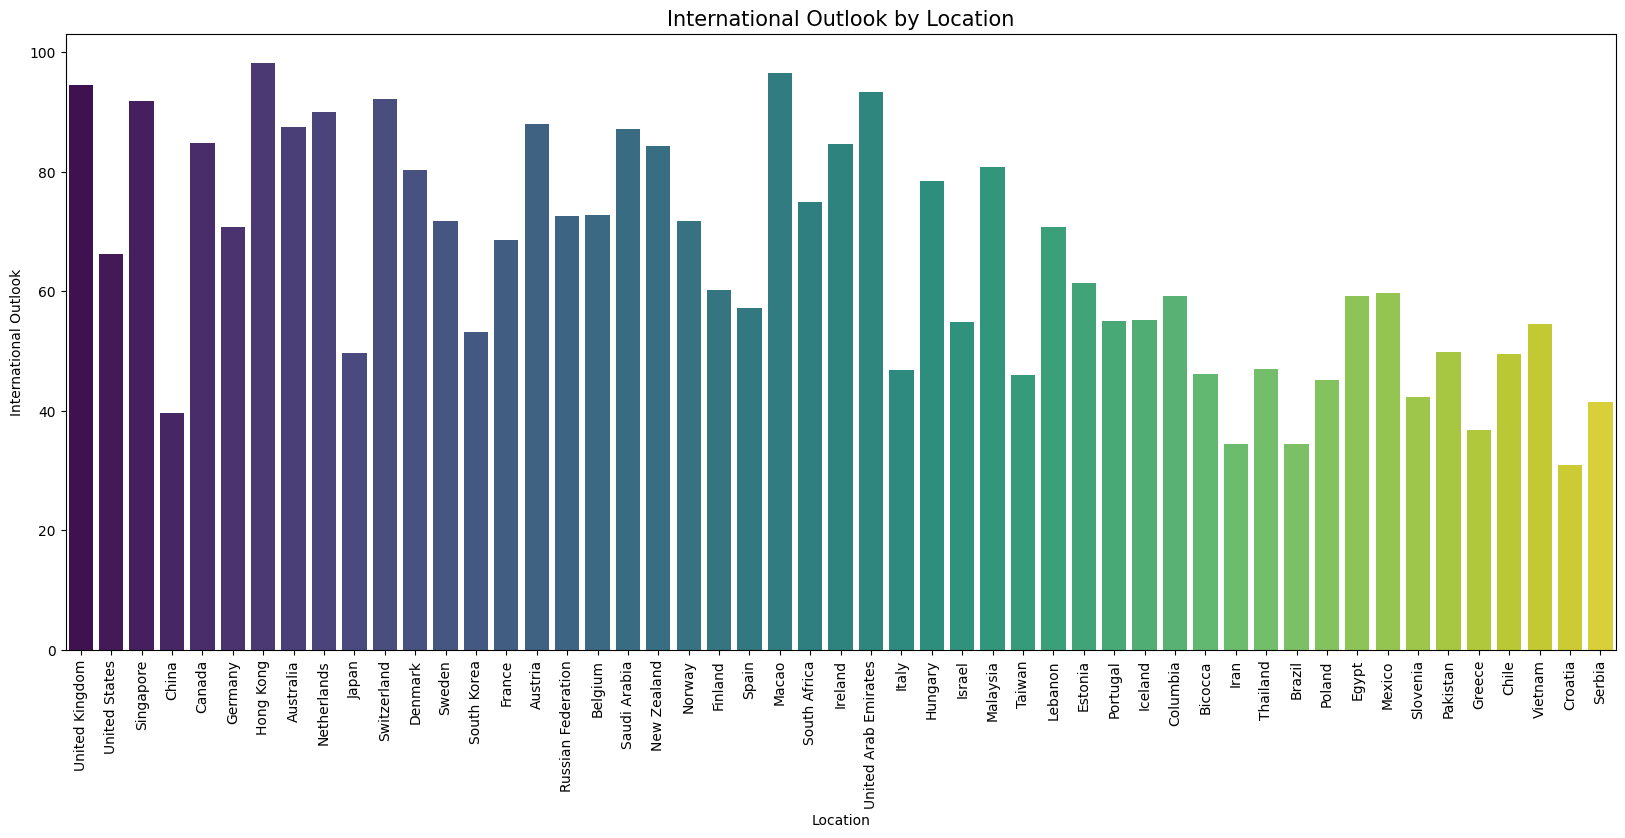

In [185]:
plt.figure(figsize=(20,8))
sns.barplot(x='Location', y='International Outlook', data=df, palette='viridis',ci=None)
plt.title('International Outlook by Location', fontsize=15)
plt.xticks(rotation=90)
plt.show()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_29104\3232628353.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Industry', data=df, palette='viridis',ci=None)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_29104\3232628353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Industry', data=df, palette='viridis',ci=None)


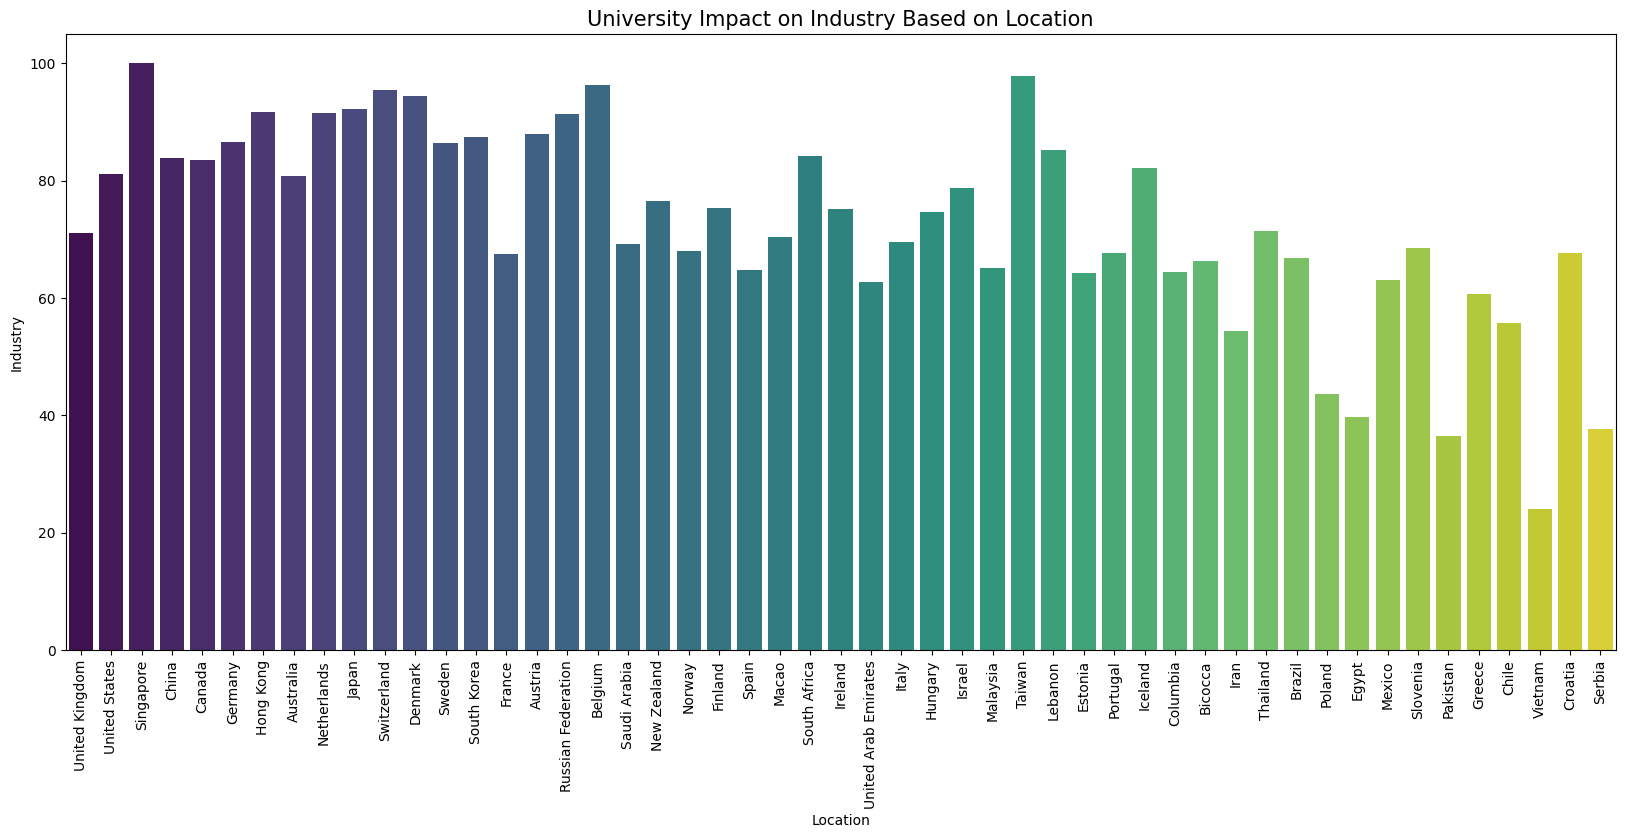

In [184]:
plt.figure(figsize=(20,8))
sns.barplot(x='Location', y='Industry', data=df, palette='viridis',ci=None)
plt.title('University Impact on Industry Based on Location', fontsize=15)
plt.xticks(rotation=90)
plt.show()

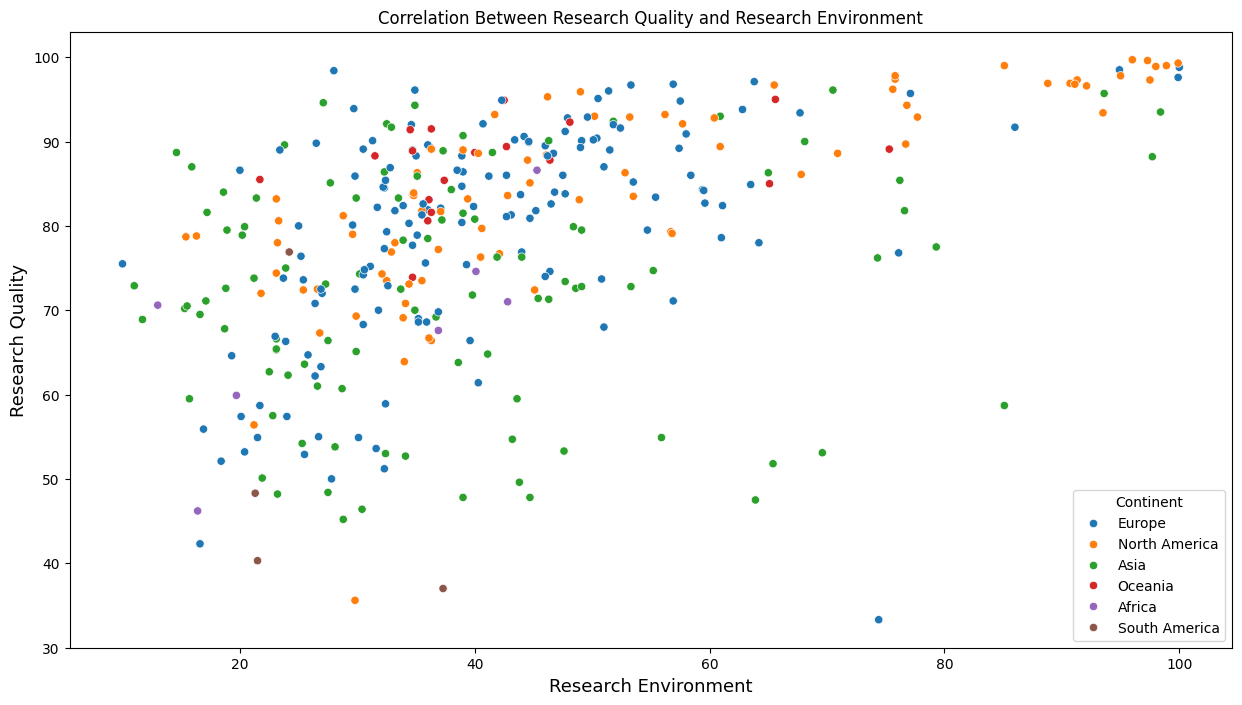

In [179]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Research Environment', y='Research Quality', hue='Continent', data=df)
plt.xlabel('Research Environment', fontsize=13)
plt.ylabel('Research Quality', fontsize=13)
plt.title("Correlation Between Research Quality and Research Environment")
plt.show()

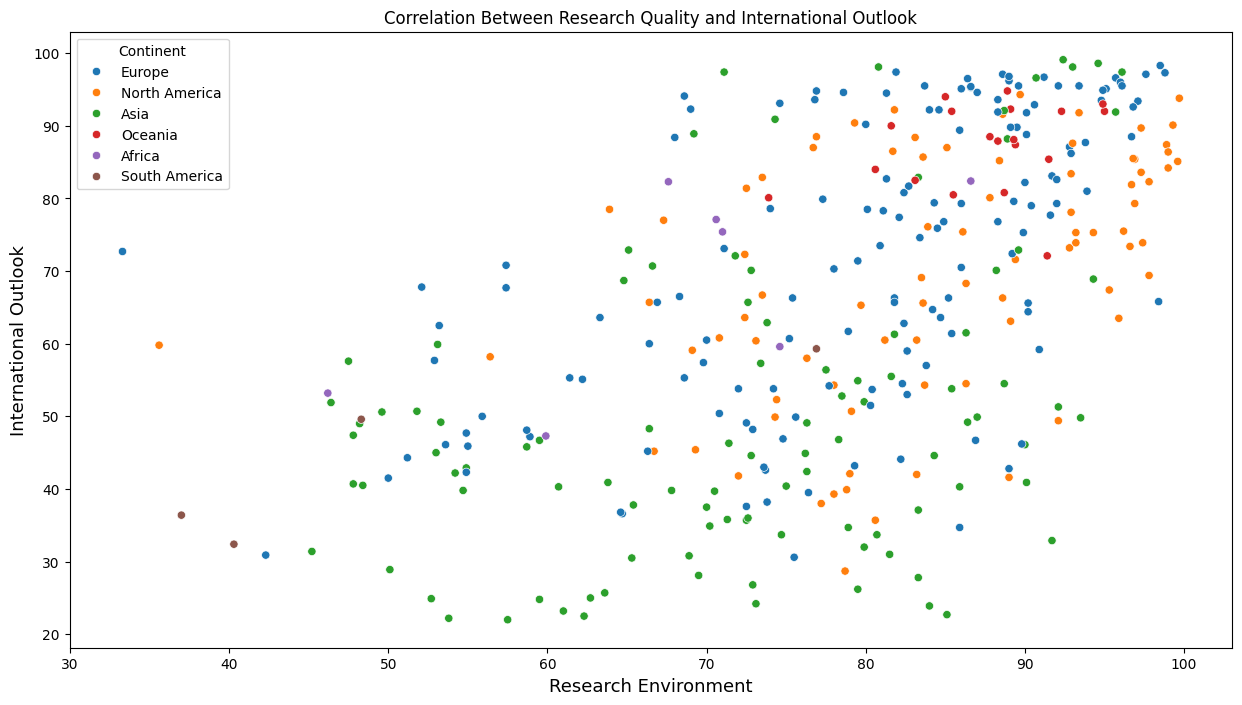

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Research Quality', y='International Outlook', hue='Continent', data=df)
plt.xlabel('Research Environment', fontsize=13)
plt.ylabel('International Outlook', fontsize=13)
plt.title("Correlation Between Research Quality and International Outlook")
plt.show()

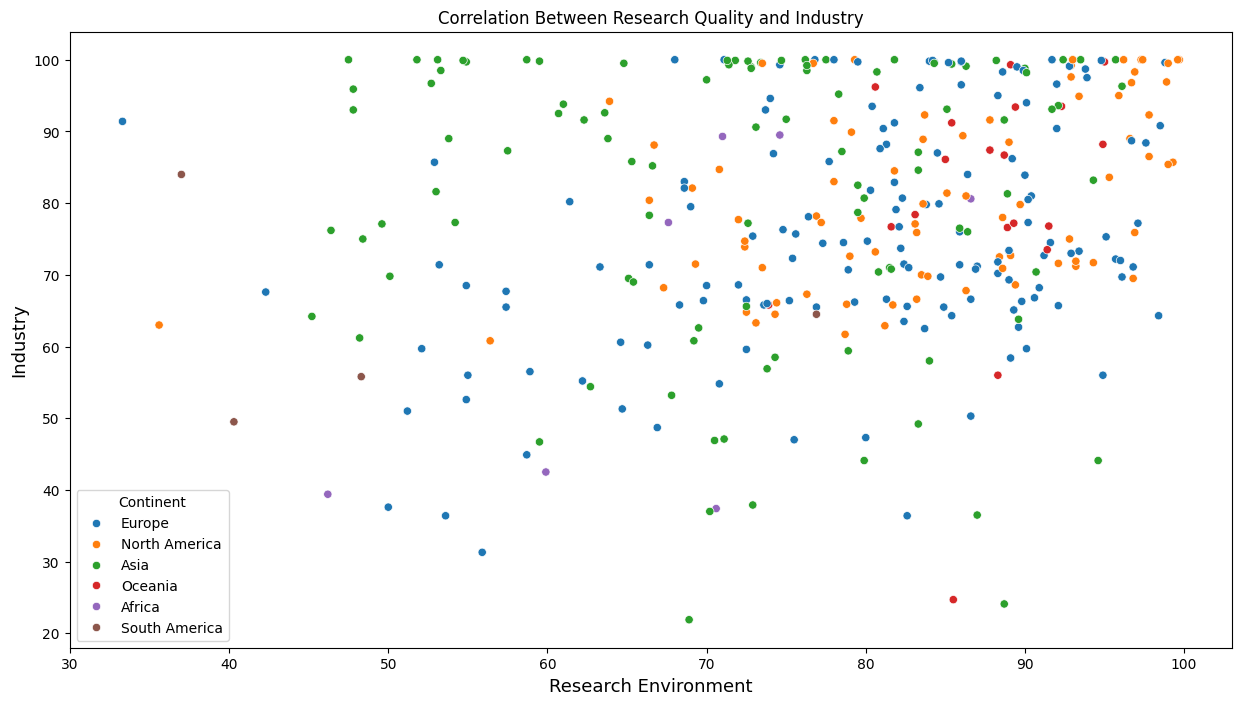

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Research Quality', y='Industry', hue='Continent', data=df)
plt.xlabel('Research Environment', fontsize=13)
plt.ylabel('Industry', fontsize=13)
plt.title("Correlation Between Research Quality and Industry")
plt.show()

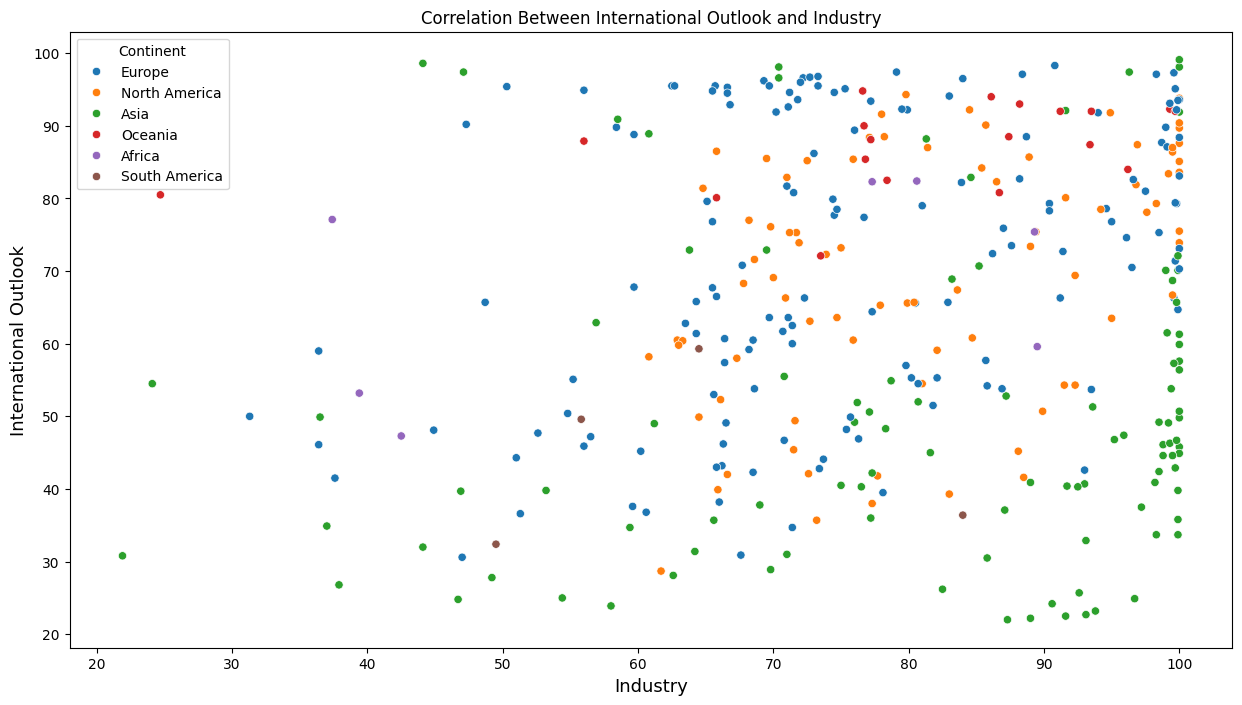

In [181]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Industry', y='International Outlook', hue='Continent', data=df, legend=True)
plt.xlabel('Industry', fontsize=13)
plt.ylabel('International Outlook', fontsize=13)
plt.title("Correlation Between International Outlook and Industry")
plt.show()